In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
import datetime as datetime
import glob
 
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
eci = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [4]:
Germany = eci[eci['Territory'] == 'Germany']
Germany = Germany[Germany['Pricing, Delivery_Terms_Approved'] == 1]
Germany = Germany[Germany['Total_Amount_Currency'] == 'EUR']
Germany.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
69,17590,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2017,NaT,1,EUR,"549,780.00",EUR,"549,780.00",Closed Lost,Prod_Category_A_None
79,18279,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q2,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
80,18274,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q3,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
129,5042,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/15/2015,...,Q2,2016,NaT,20,EUR,"9,809,800.00",EUR,"9,809,800.00",Closed Lost,Prod_Category_A_None
374,8326,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,1/7/2016,...,Q2,2016,NaT,8,EUR,"4,375,800.00",EUR,"4,375,800.00",Closed Lost,Prod_Category_A_None
402,23254,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,10/1/2014,...,Q2,2016,NaT,0,EUR,"152,490.00",EUR,"152,490.00",Closed Lost,Prod_Category_A_None
403,17926,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,1,EUR,"744,120.00",EUR,"744,120.00",Closed Lost,Prod_Category_A_None
404,16008,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,3,EUR,"1,614,990.00",EUR,"1,614,990.00",Closed Lost,Prod_Category_A_None
444,17486,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q3,2016,NaT,0,EUR,"175,950.00",EUR,"175,950.00",Closed Won,Prod_Category_A_None
575,12764,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,1,EUR,"492,468.75",EUR,"492,468.75",Closed Lost,Prod_Category_A_None


In [5]:
GermanyWon = Germany[Germany['Stage'] == 'Closed Won']
GermanyWon.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
79,18279,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q2,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
80,18274,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q3,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
444,17486,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q3,2016,NaT,0,EUR,"175,950.00",EUR,"175,950.00",Closed Won,Prod_Category_A_None
668,13997,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"84,000.00",Closed Won,Prod_Category_A_None
673,5600,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,1/2/2017,...,Q1,2017,NaT,1,EUR,"235,659.38",EUR,"235,659.38",Closed Won,Prod_Category_A_None
748,14986,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"86,100.00",EUR,"86,100.00",Closed Won,Prod_Category_A_None
778,18061,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"92,437.50",EUR,"249,562.50",Closed Won,Prod_Category_A_None
779,18064,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
780,18068,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"73,125.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
821,4868,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/14/2016,...,Q1,2017,NaT,1,EUR,"287,525.00",EUR,"287,525.00",Closed Won,Prod_Category_A_None


In [6]:
GermanyWonEUR = GermanyWon[GermanyWon['Total_Amount_Currency'] == 'EUR']
GermanyWonEUR.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
79,18279,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q2,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
80,18274,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q3,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
444,17486,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q3,2016,NaT,0,EUR,"175,950.00",EUR,"175,950.00",Closed Won,Prod_Category_A_None
668,13997,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"84,000.00",Closed Won,Prod_Category_A_None
673,5600,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,1/2/2017,...,Q1,2017,NaT,1,EUR,"235,659.38",EUR,"235,659.38",Closed Won,Prod_Category_A_None
748,14986,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"86,100.00",EUR,"86,100.00",Closed Won,Prod_Category_A_None
778,18061,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"92,437.50",EUR,"249,562.50",Closed Won,Prod_Category_A_None
779,18064,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
780,18068,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"73,125.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
821,4868,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/14/2016,...,Q1,2017,NaT,1,EUR,"287,525.00",EUR,"287,525.00",Closed Won,Prod_Category_A_None


In [35]:
GermanyQuarters = GermanyWonEUR.groupby(['Delivery_Year','Delivery_Quarter']).agg({'Pricing, Delivery_Terms_Approved':'sum'}).unstack()
GermanyQuarters

Pricing, Delivery_Terms_Approved                       \
Delivery_Quarter                               Q1                   Q2   
Delivery_Year                                                            
2016                                         2.00                22.00   
2017                                        48.00               113.00   
2018                                        30.00                55.00   
2019                                        19.00                  nan   

                                                            
Delivery_Quarter                   Q3                   Q4  
Delivery_Year                                               
2016                            26.00                41.00  
2017                            37.00                15.00  
2018                            52.00                93.00  
2019                              nan                  nan

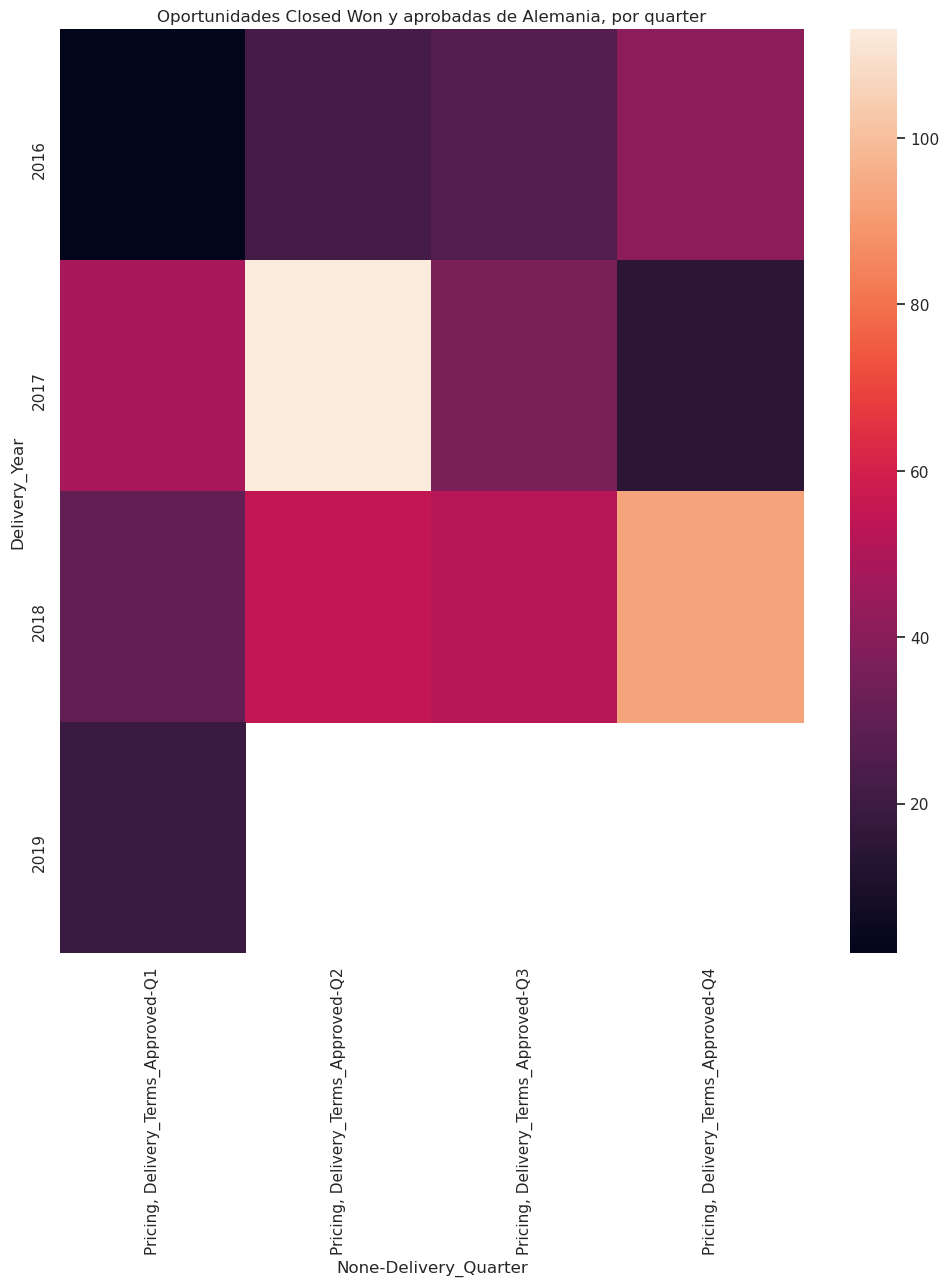

In [37]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax.set_title('Oportunidades Closed Won y aprobadas de Alemania, por quarter')
sns.heatmap(GermanyQuarters,ax = ax)